In [11]:
# Declare an exception
from optimizationExceptions import *

# Define a function simple to call for the inner product
def scalarInner(a,b):
    return np.asscalar(a.T.dot(b)) 


def lineSearch(obj,x,d,alpha0,beta1,beta2,lbd):
    if  lbd <= 1:
        raise OptimizationValueOutOfRange("lambda is {} and must be > 1".format(lbd))
    if  alpha0 <= 0:
        raise OptimizationValueOutOfRange("alpha0 is {} and must be > 0".format(alpha0))
    if  beta1 >= beta2:
        raise OptimizationValueOutOfRange("Incompatible Wolfe cond. parsmeters: beta1={} is greater than beta2={}".format(beta1,beta2))
    (f,g) = obj(x)
    deriv = scalarInner(g,d)
    if deriv >= 0:
        raise OptimizationInputError("d is not a descent direction: {} >= 0".format(deriv))
    i = 0
    alpha = alpha0
    alphal = 0
    alphar = np.finfo(np.float64).max
    finished = False
    iters = list()
    iters.append([alpha,alphal,alphar,""])
    while not finished:
        xnew = x+alpha * d ;
        (fnew,gnew) = obj(xnew)
        # First Wolfe condition
        if fnew > f + alpha * beta1 * deriv:
            reason = "too long"
            alphar = alpha ;
            alpha = (alphal + alphar) / 2.0 ;
        # Second Wolfe condition
        elif scalarInner(gnew,d) < beta2 * deriv:
            reason = "too short"
            alphal = alpha ;
            if alphar == np.finfo(np.float64).max:
                alpha = lbd * alpha ;
            else:
                alpha = (alphal + alphar) / 2.0
        else:
            reason = "ok"
            finished = True
        iters.append([alpha,alphal,alphar,reason])
    return (alpha,iters)


In [21]:
import numpy as np
from scipy import optimize

def steepestDescent(obj,D,x0,eps,alpha0,beta1,beta2,lbd,maxiters=100):
    xk = list()
    x = x0
    k = 0
    (f,g) = obj(x)
    while np.linalg.norm(g) > eps and k < maxiters:
        De = D(x)
        d = - np.dot(De,g)
        (alpha,iters) = lineSearch(obj,x,d,alpha0,beta1,beta2,lbd)

        x = x + alpha*d
        xk.append(x)
        k = k+1
    if k == maxiters:
        print('Method failed')
    return (xk,k)


Consider the problem \\[ \min 3x_1^2+x_2^4 \\]
with starting point $x_0=(1,-2)^T$.

In [55]:
def func(x):
    f = 3*x.item(0)**2+x.item(1)**4
    g = np.array([[6*x.item(0)],[4*x.item(1)**3]])
    return (f,g)

x0 = np.array([[1],[-2]])
lbd = 2
beta1 = 10**(-4)
beta2 = 0.99
alpha0 = 0.01
eps = 10**(-15)
def D1(x):
    y = max(1,12*x.item(1)**2)
    D1= np.array([[1/6,0],[0,1/y]])
    return D1

def D2(x):
    return D1(x0)

def D3(x):
    y1 = 1/max(1,x[0])
    y2 = 1/max(1,x[1])
    return np.array([[y1,0],[0,y2]])

(xk1,k1) = steepestDescent(func,D1,x0,eps,alpha0,beta1,beta2,lbd,100)
(xk2,k2) = steepestDescent(func,D2,x0,eps,alpha0,beta1,beta2,lbd,100)
(xk3,k3) = steepestDescent(func,D3,x0,eps,alpha0,beta1,beta2,lbd,100)

Method failed
Method failed


OptimizationInputError: d is not a descent direction: 3.75884800000005 >= 0

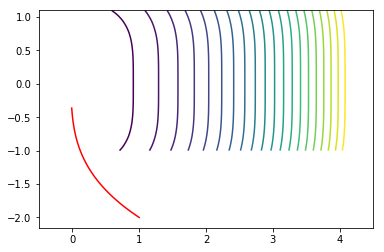

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

def f(x):
    f =  3*x[0]**2+x[1]**4
    return f

fig = plt.figure()

xmesh, ymesh = np.mgrid[-0.1:4.1:50j,-1:1.1:50j]
fmesh = f(np.array([xmesh, ymesh]))

plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 20)
xiter = [xk[k][0] for k in range(len(xk))]
xiter.insert(0,x0[0])
yiter = [xk[k][1] for k in range(len(xk))]
yiter.insert(0,x0[1])
plt.plot(xiter,yiter,color='r')
plt.show()

In [42]:
xk

[array([[ 0.98      ],
        [-1.98666667]]), array([[ 0.97      ],
        [-1.97991021]]), array([[ 0.96      ],
        [-1.97310757]]), array([[ 0.95      ],
        [-1.96625794]]), array([[ 0.94     ],
        [-1.9593605]]), array([[ 0.93      ],
        [-1.95241442]]), array([[ 0.92      ],
        [-1.94541882]]), array([[ 0.91      ],
        [-1.93837282]]), array([[ 0.9       ],
        [-1.93127551]]), array([[ 0.89      ],
        [-1.92412593]]), array([[ 0.88      ],
        [-1.91692313]]), array([[ 0.87      ],
        [-1.90966609]]), array([[ 0.86      ],
        [-1.90235379]]), array([[ 0.85      ],
        [-1.89498517]]), array([[ 0.84      ],
        [-1.88755913]]), array([[ 0.83      ],
        [-1.88007455]]), array([[ 0.82      ],
        [-1.87253026]]), array([[ 0.81      ],
        [-1.86492505]]), array([[ 0.8       ],
        [-1.85725769]]), array([[ 0.79      ],
        [-1.84952689]]), array([[ 0.78      ],
        [-1.84173133]]), array([[ 0.77 

In [56]:
def Rosenbrock(x):
    f = 100*(x[1]-x[0]**2)**2+(1-x[0])**2
    df = np.array([-400*(x[1]-x[0]**2)*x[0] - 2*(1-x[0]),200*(x[1]-x[0]**2)])
    return (f,df)

x0 = np.array([[-1.5],[1.5]])

def D1(x):
    y1 = 1/max(1,1200*x[0]**2 - 400*x[1] +2)
    y2 = 1/200
    return np.array([[y1,0],[0,y2]])

(xk1,k1) = steepestDescent(func,D1,x0,eps,alpha0,beta1,beta2,lbd,100)

    


Method failed
